### Quantum Cryptography - Day7
# BB84  Protocol with Noise
In this notebook we will studies the **BB84 Quantum Key Distribution protocol** under the influence of **depolarizing noise**.In this we wil measure the impact of noise o the key surival rate and plot **Noise vs QBER(Quantum Bit Error Rate)**.In this notebook we will learn:
- How the **BB84 QKD protocol works**
- How to simulate BB84 using **AerSimulator**
- Hoe to **inject depolarizing noise** into quantum channel.
- How measure the **Quantum Bit Error Rate(QBER)** and **Key Survival Rate**
- How noise affect the security anf reliability of QKD
- Hoe to visualize **Noise affects the security anf key survival rate** using plots.

## Import Required Libraries

In [19]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator,noise
import numpy as np
import matplotlib.pyplot as plt
import random


## Step 1 : Define Helper Functions
1. **generates_bits**:Randomly generates bit for Alice.
2. **generate_bases** : Randomly generates bases(z=0,X=1) for alice and bob.
3. **create_BB84_circuit** : Encodes Alice's bits in her choosen basis.
4. **measure_BB84** : Bob measure his in randomly choosen basis.

In [20]:
def generate_bits(n):
    return [random.randint(0,1) for _ in range(n)]


def generate_bases(n):
    return [random.randint(0,1) for _ in range(n)]

def create_bb84_circuit(bits,bases):
    n=len(bits)
    qc=QuantumCircuit(n,n)
    for i in range(n):
        if bits[i]==1:
            qc.x(i)
        if bases[i]==1:
            qc.h(i)
    return qc

def measure_bb84(qc,bases):
    n=len(bases)
    for i in range(n):
        if bases[i]==1:
            qc.h(i)
        qc.measure(i,i)
    return qc

## Step 2 : Define Noise Model
we use **depolarizing noise** to simulatereaostic quantum channel errors.
- The depolarizing channel flips a qubit withprobability 'p'.
- This models imperfect transmission or environmental interference.

In [29]:
def create_depolarizing_noise_model(p,n_qubits):
    error=noise.depolarizing_error(p,1)
    noise_model=noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error,['id','x','h'])
    return noise_model

## Step 3 :Simulate BB84 with Noise
- Generate Alice's bits and bases
- Generate Bob's bases
- Create measure BB84 circuit
- Inject depolarising noise via AerSimulator
- Calclate **Key survival rate** and **QBER**

In [30]:
def simulate_bb84_with_noise(n_bits=100,noise_prob=0.05):
    alice_bits=generate_bits(n_bits)
    alice_bases=generate_bases(n_bits)
    bob_bases=generate_bases(n_bits)

    qc=create_bb84_circuit(alice_bits,alice_bases)
    qc=measure_bb84(qc,bob_bases)

    sim=AerSimulator(noise_model=create_depolarizing_noise_model(noise_prob,n_bits))
    result=sim.run(qc,shots=1).result()
    counts=result.get_counts()
    measured_bits=[int(bit) for bit in list(counts.keys())[0][::-1]]

    ##sifted key(where bases matches)
    sifted_indices=[i for i in range(n_bits) if alice_bases[i]==bob_bases[i]]
    sifted_alice=[alice_bits[i] for i in sifted_indices]
    sifted_bob=[measured_bits[i] for i in sifted_indices]

    ## Caluculate QBER and Key Survival Rate
    errors=sum([1 for a,b in zip(sifted_alice,sifted_bob) if  a!= b])
    qber=errors/max(len(sifted_alice),1)
    key_survival_rate=len(sifted_alice)/n_bits

    return qber,key_survival_rate



## Step 4 : Analyze noise vs QBER
we will vary the depolarizing probability from 0 to 0.2  and plot its effect on QBER and Key survival rate.

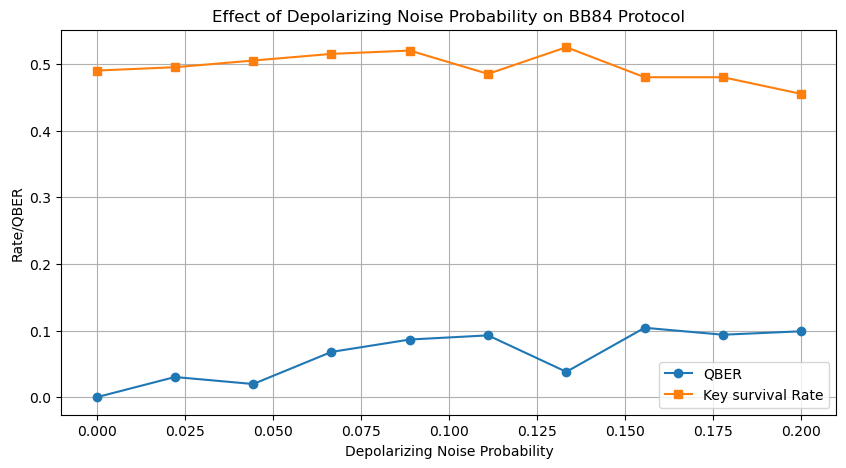

In [31]:
noise_probs=np.linspace(0,0.2,10)
qbers=[]
key_rates=[]
for p in noise_probs:
    qber,key_rate = simulate_bb84_with_noise(n_bits=200, noise_prob=p)
    qbers.append(qber)
    key_rates.append(key_rate)

#plot Noise vs QBER
plt.figure(figsize=(10,5))
plt.plot(noise_probs,qbers,'o-',label='QBER')
plt.plot(noise_probs,key_rates,'s-',label='Key survival Rate')
plt.xlabel('Depolarizing Noise Probability')
plt.ylabel('Rate/QBER')
plt.title('Effect of Depolarizing Noise Probability on BB84 Protocol')
plt.legend()
plt.grid(True)
plt.show()

The above plot shows the effect od depolarizing noise on BB84 protocol.
- Blue line : represent the Quantum Bit Error Rate(QBER),which increses as the noise probability rises. indicating more errors in the transmitted key.evedropping reduces the security of the key.
- Orange line : represent the Key survival rate, which stay roughly constant(near 50 %) since it depend mainly on matchong bases between Alice and Bob.

This illustrate that increasing noise increses error but has littele effect on the sifted key fraction.

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day07_BB84_with_Noise.ipynb

**Date created**: 30-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>